In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(50)
coord_cols = ['x', 'y', 'z']
speed_cols = ['Vx', 'Vy', 'Vz']
state_cols = coord_cols + speed_cols

In [3]:
problem_list = [1, 587, 372,  37, 473, 523, 514, 253,
                481,  35, 515, 162, 277, 244, 443, 572,
                362, 550,  26, 310, 252, 517, 127, 396,
                391, 471, 333, 28,  54, 6, 502, 316, 225,
                82, 309, 268, 470, 456, 460, 510,516, 22,
                194, 511, 544, 438, 435, 486,  52, 548, 528]

In [4]:
last_sub = pd.read_csv('data/shiftzero_kp.csv', index_col = 'id')
last_sub1 = pd.read_csv('data/shiftzero_kp.csv', index_col = 'id')
last_sub.shape

(284071, 6)

In [5]:
test_data = pd.read_csv('data/test.csv', index_col='id')


In [6]:
last_sub.loc[:, 'sat_id'] = test_data.loc[last_sub.index, ['sat_id']]
last_sub.head()

,x,y,z,Vx,Vy,Vz,sat_id
id,,,,,,,
3927,-24827.438045,-11033.157425,6491.539028,2.648344,-1.412494,1.100006,1
3928,-21193.837525,-12972.382245,7900.352874,3.328534,-1.318218,0.987851,1
3929,-16649.847560,-13303.966964,8592.811956,3.930690,-0.621180,0.623229,1
3930,-11292.545901,-13546.613057,9120.467938,4.637731,0.125149,0.152275,1
3931,-4954.390162,-12946.547517,8828.892214,5.512149,1.176910,-0.626120,1


In [7]:
for sat_id in problem_list:
    
    sat_data = last_sub[last_sub.sat_id == sat_id ].copy()
    for feature_name in ['x','y','z','Vx','Vy','Vz']:
        indx = sat_data.index
#         indx = indx[int(0.5*len(indx)):len(indx)]
        
        sat_data.loc[indx,feature_name] = sat_data.loc[indx,feature_name].rolling(window=3).median().shift(-1).values
        last_sub.loc[indx[1:-2], :]= sat_data.loc[indx[1:-2],:].values    

In [8]:
last_sub = last_sub.drop(columns = ['sat_id'])
last_sub.head()

,x,y,z,Vx,Vy,Vz
id,,,,,,
3927,-24827.438045,-11033.157425,6491.539028,2.648344,-1.412494,1.100006
3928,-21193.837525,-12972.382245,7900.352874,3.328534,-1.318218,0.987851
3929,-16649.847560,-13303.966964,8592.811956,3.930690,-0.621180,0.623229
3930,-11292.545901,-13303.966964,8828.892214,4.637731,0.125149,0.152275
3931,-4954.390162,-12946.547517,8828.892214,5.512149,1.176910,-0.626120


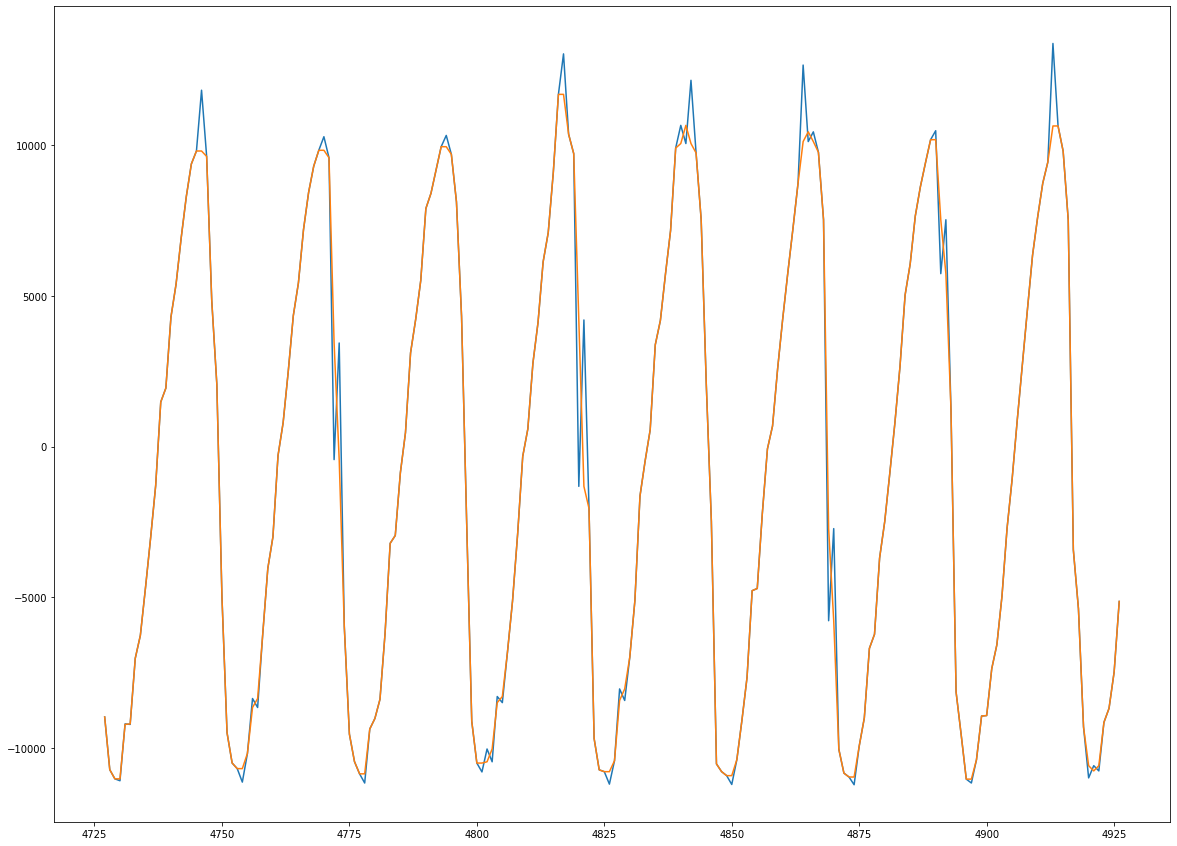

In [9]:
plt.figure(figsize = (20,15))

plt.plot(last_sub1.iloc[800:1000, :].z)
plt.plot(last_sub.iloc[800:1000, :].z)

In [10]:
last_sub.to_csv('nla+MA_3_correction_full_range_problem_sat_kp_shift_median.csv')